In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

#### Ensure that you have the same tf and tfds version as below or else it might not work

In [26]:
tf.__version__,tfds.__version__

('2.4.1', '4.2.0')

#### Need to download gs://cbis-ddsm-tf/curated_breast_imaging_ddsm into ~/tensorflow_datasets/ so that the path is ~/tensorflow_datasets/curated_breast_imaging_ddsm

Requires you to download the source data manually into download_config.manual_dir (defaults to ~/tensorflow_datasets/downloads/manual/):

In [ ]:
ds,info = tfds.load('curated_breast_imaging_ddsm/patches', split=['train','test','validation'], shuffle_files=True,
              with_info=True)
ds_train,ds_test,ds_valid = ds

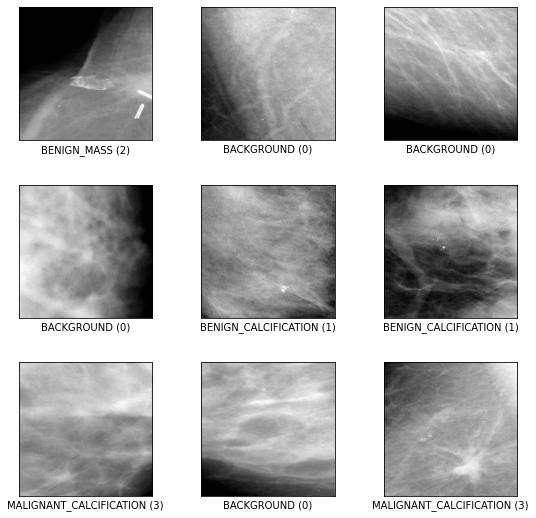

In [24]:
fig = tfds.show_examples(ds_train, info)

Prepare train_dataset to feed into a NN model

In [20]:
@tf.function
def load_image_train(datapoint):
    input_image = tf.image.resize(datapoint['image'], (224, 224))

    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)

    return input_image

In [21]:
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [ ]:
train = ds_train.map(load_image_train, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)